In [11]:
from gravipy.tensorial import *
from sympy import *
import inspect
import sympy as sym
sym.init_printing()

$$
ds^2 = -e^{2F(r,t)} \, dt^2 + e^{2H(r,t)} \, dr^2 + r^2 \left( d\theta^2 + \sin^2\theta \, d\phi^2 \right)
$$

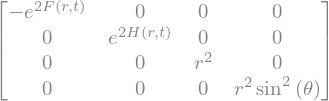

In [12]:

# Define the coordinates
t, r, theta, phi = symbols('t r theta phi')
x = Coordinates('\chi', [t, r, theta, phi])

# Define the metric components
F = Function('F')(r, t)
H = Function('H')(r, t)


Metric = diag(-exp(2 * F),exp(2 * H),r**2 ,r**2 * sin(theta)**2)

g = MetricTensor('g',x,Metric)

Metric

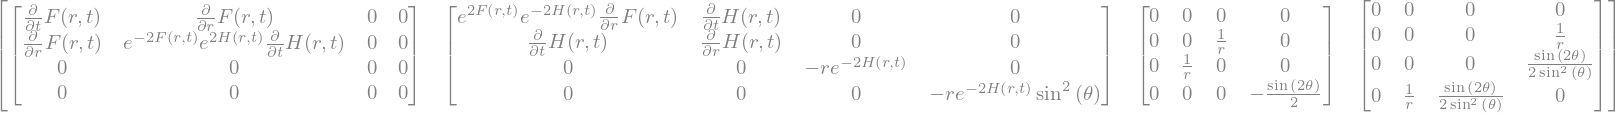

In [13]:
# Compute the Christoffel symbols
christoffel = Christoffel('Ga',g)
christoffel(-All,All,All)



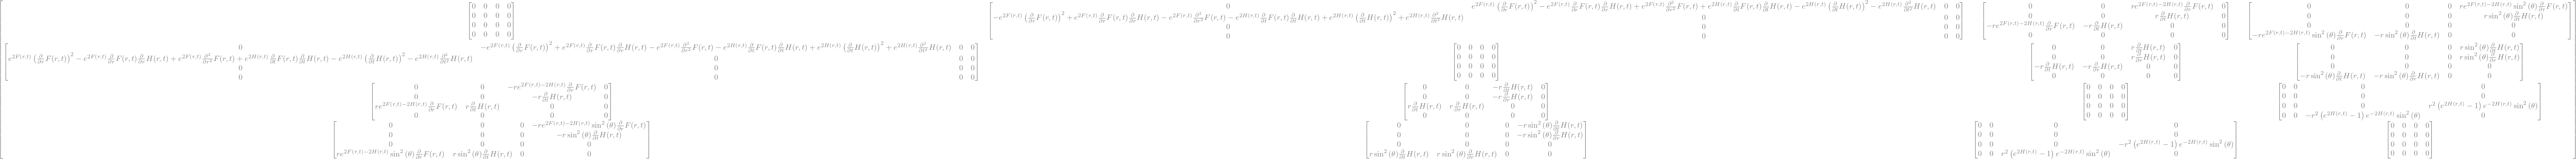

In [14]:
Rm= Riemann('Rm', g)
Rm(All,All,All,All)

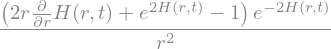

In [15]:
Ri = Ricci('Ri', g)
G= Einstein('G', Ri)
simplify(-G(1,-1))


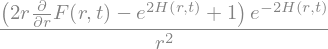

In [16]:
simplify(G(2,-2))

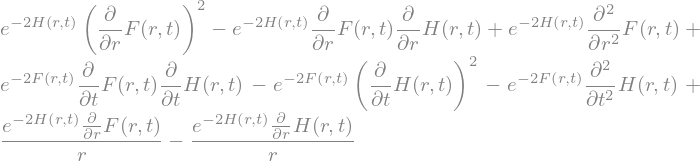

In [17]:
simplify(G(3,-3))

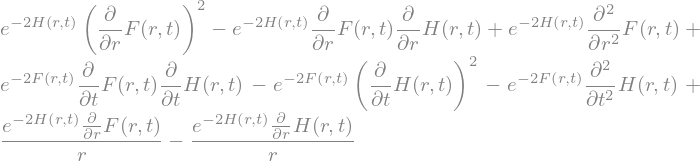

In [18]:
simplify(G(4,-4))

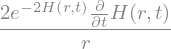

In [19]:
simplify(G(1,-2))

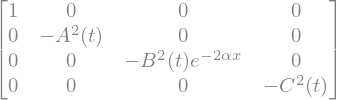

In [20]:
# (2)
# Define the coordinates
t, x, y, z,alpha = symbols('t x y z \\alpha')
v = Coordinates('\chi', [t, x, y, z])

# Define the metric components
A = Function('A')(t)
B = Function('B')(t)
C = Function('C')(t)


Metric = diag(1,-A**2,- B**2*exp(-2*alpha*x), - C**2)

g2 = MetricTensor('g',v,Metric)

Metric



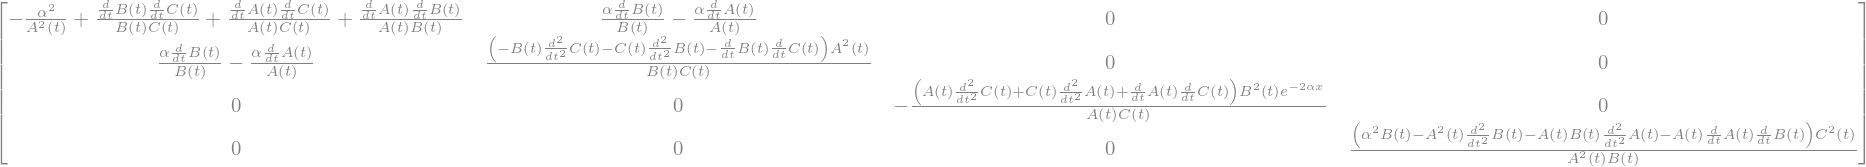

In [21]:
christoffel2 = Christoffel('Ga',g2)
Ri2 = Ricci('Ri', g2)
G2= Einstein('G', Ri2)

G2(All,All)


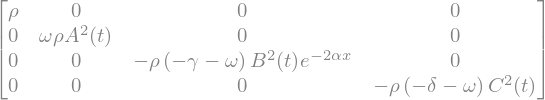

In [22]:
from sympy import symbols, Eq, latex

# energy momentum tensor: 

alpha, omega, gamma, delta, rho = symbols('\\alpha, \\omega, \\gamma, \\delta, \\rho' )

T = rho*diag(1, - omega, - (omega + gamma), - (omega + delta))
T_ij = Metric*T

T_ij

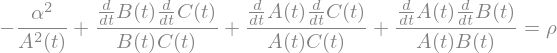

In [23]:
Eq(G2(1,1), T_ij[0,0])

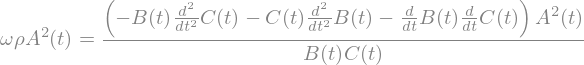

In [24]:
simplify(Eq(G2(2,2), T_ij[1,1]))

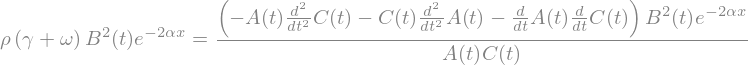

In [25]:
simplify(Eq(G2(3,3), T_ij[2,2]))

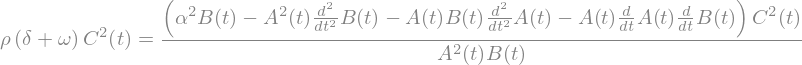

In [26]:
simplify(Eq(G2(4,4), T_ij[3,3]))

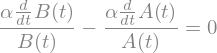

In [27]:
Eq(G2(1,2), T_ij[0,1])

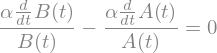

In [28]:
y =Eq(G2(2,1), T_ij[1,0])
y

In [29]:
from sympy import symbols, Function, Eq, Derivative, solve


# derivative functions 
A_dot = Derivative(A, t)  # 
B_dot = Derivative(B, t)  # 




simplified_equation = Eq(B_dot / B, A_dot / A)

# solve for B
solution_B = dsolve(simplified_equation, B)

#solve for A
solution_A = dsolve(simplified_equation, A)


print("Solution for  B(t)")
display(solution_B)

print("Solución for A(t)")
display(solution_A)


Solution for  B(t)


Solución for A(t)


## Now, we need to take the derivative of the solution 
$$
\ddot{A} = C_1 \ddot{B}(t),
$$
## the new equation (7) is
$$
 \frac{\ddot{B(t)}}{B(t) } + \frac{\ddot{C}}{{C}} + \frac{\dot{B(t)}}{B(t)} \frac{\dot{C(t)}}{C(t)} = - (\omega + \delta )  \rho
$$
# and with the (6)

$$

\frac{\ddot{B(t)}}{B(t)} + \frac{\ddot{C}}{C} +  \frac{\dot{B(t)}}{B(t)} \frac{\dot{C(t)}}{C(t)} = - \omega \rho
$$

In [30]:
B_dot = Derivative(B, t)  
B_ddot = Derivative(B, t, t) 
C_dot = Derivative(C, t) 
C_ddot = Derivative(C, t, t)  


eq6 = B_ddot/B + C_ddot/C + (B_dot/B)*(C_dot/C) + omega*rho

eq7 = B_ddot/B + C_ddot/C + (B_dot/B)*(C_dot/C) + (omega + delta)*rho


Dif = latex(simplify(eq6 - eq7))



print(f' We subtract the value {Dif} = 0' )






 We subtract the value - \delta \rho = 0


## By solving the set of field equations, the di↵erence between the expansion rates on x and z axes could be found 
$$
H_x = \frac{\dot{A}}{A}, \, H_y = \frac{\dot{B}}{B}, \, H_z = \frac{\dot{C}}{C} 

$$

## and the mean Hubble parameter is given by
$$
H = \frac{1}{3} \frac{\dot{V}}{V} =  \frac{1}{3} \left( \frac{\dot{A}}{A} + \frac{\dot{B}}{B} + \frac{\dot{C}}{C}\right)
$$

## By solving the set of field equations, the di↵erence between the expansion rates on $x$ a_nd $z$ axes could be found $ H_x - H_z $.


## Sol. 

### The field equations are reduced to the equations below, when $B(t) = C_1 A(t)$ and $\delta = 0$ are substituted in the above equation system : 
$$
\left(\frac{\dot{A}}{A} \right)^2 + 2 \frac{\dot{A}}{A} \frac{\dot{C}}{C} - \frac{\alpha^2}{A^2} = \rho,
$$
$$
\frac{\ddot{A}}{A} + \frac{\ddot{C}}{C} + \frac{\dot{A}}{A} \frac{\dot{C}}{C} = - \omega \rho,
$$

$$
2 \frac{\ddot{A}}{A} + \frac{\dot{A}^2}{A} - \frac{\alpha^2}{A^2} =  - (\omega + \gamma) \rho
$$

## from the second and third equation, we have 



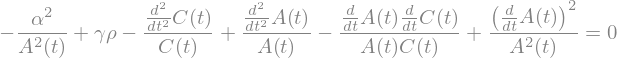

In [31]:
from sympy import symbols, Function, Eq, Derivative, solve

# Definir símbolos y funciones
t = symbols('t')  # Variable independiente (tiempo)
A = Function('A')(t)  # Función A(t)
C = Function('C')(t)  # Función C(t)
alpha, rho, omega, gamma = symbols('alpha rho omega gamma', real=True)  # Constantes

# Definir las derivadas
A_dot = Derivative(A, t)  # Primera derivada de A: dA/dt
A_ddot = Derivative(A, t, t)  # Segunda derivada de A: d²A/dt²
C_dot = Derivative(C, t)  # Primera derivada de C: dC/dt
C_ddot = Derivative(C, t, t)  # Segunda derivada de C: d²C/dt²

# Definir las ecuaciones
eq11 = (A_dot / A)**2 + 2 * (A_dot / A) * (C_dot / C) - alpha**2 / A**2 - rho
eq22 = A_ddot / A + C_ddot / C + (A_dot / A) * (C_dot / C) + omega * rho 
eq33 = 2 * (A_ddot / A) + (A_dot**2 / A**2) - alpha**2 / A**2 + (omega + gamma) * rho

Dif=  eq33  - eq22
Dif_si = simplify(Dif)
Eq1 =(Eq(Dif_si,0))

Eq1


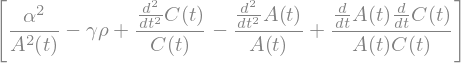

In [32]:
solve(Eq1, (A_dot/A)**2)  


Equation of Motion:


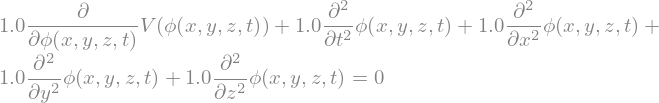

In [33]:
import sympy as sp

# Define symbols
x, y, z, t = sp.symbols('x y z t')  # Spacetime coordinates
coords = [x, y, z, t]  # List of coordinates
phi = sp.Function('phi')(x, y, z, t) # Scalar field
g = sp.Symbol('g')                  # Determinant of metric tensor
V = sp.Function('V')(phi)            # Potential function

# Define the Lagrangian density
lagrangian = (1/2) * sum(sp.Derivative(phi, coord)**2 for coord in [x, y, z, t]) - V

# Euler-Lagrange equation for phi
def euler_lagrange(lagrangian, field, coords):
    dL_dphi = sp.diff(lagrangian, field)
    dL_dphidot = [sp.diff(lagrangian, sp.Derivative(field, coord)) for coord in coords]
    d_dx_dL_dphidot = [sp.diff(term, coord) for term, coord in zip(dL_dphidot, coords)]
    return sum(d_dx_dL_dphidot) - dL_dphi

# Compute the equation of motion
eom = euler_lagrange(lagrangian, phi, coords)

# Display the result
print("Equation of Motion:")
Eq(sp.simplify(eom),0)


In [37]:


# Define the coordinates
t, r, theta, phi, = symbols('t r theta phi')
x = Coordinates('\chi', [t, r, theta, phi])

# Define the metric components
a = Function('a')(t)
k = symbols('k')
Gamma = Christoffel('Ga',g)

Metric = sp.diag(-1, a**2 / (1 - k*r**2), a**2 * r**2, a**2 * sp.sin(theta)**2 * sp.sin(phi)**2)

g = MetricTensor('g',x,Metric)

rhs = {}
for a in range(1,4):
    for b in range(1,4): 
        for c in range(1,4):
            rhs[a,b,c] = Gamma(a,b,c) + Gamma(b,a,c)


g2 = sp.Matrix([  [-1, 0, 0, 0], [0,  a**2 / (1 - k*r**2), 0, 0], [0, 0, a**2 * r**2, 0], [0, 0, 0, a**2 * sp.sin(theta)**2 * sp.sin(phi)**2] ])


coords2 = [t,r,theta,phi]


lhs = {}
for a in range(4):
    for b in range(4):
         for c in range(4):
             lhs[a,b,c] = diff(g2[a, b], coords2[c])
                


In [38]:
import sympy as sp
from gravipy.tensorial import Coordinates, MetricTensor, Christoffel

# Define the coordinates
t, r, theta, phi = sp.symbols('t r theta phi')
x = Coordinates('\chi', [t, r, theta, phi])

# Define the metric components
a = sp.Function('a')(t)
k = sp.symbols('k')

# Define the metric tensor
Metric = sp.diag(-1, a**2 / (1 - k*r**2), a**2 * r**2, a**2 * r**2 * sp.sin(theta)**2)
g = MetricTensor('g', x, Metric)

# Compute Christoffel symbols
Gamma = Christoffel('Gamma', g)

# Compute RHS: Γ_{abc} + Γ_{bac}
rhs = {}
for a in range(4): 
    for b in range(4):
        for c in range(4):
            rhs[a, b, c] = Gamma.components.get((a, b, c), 0) + Gamma.components.get((b, a, c), 0)  

# Define metric in matrix form
g2 = sp.Matrix([
    [-1, 0, 0, 0],
    [0, a**2 / (1 - k*r**2), 0, 0],
    [0, 0, a**2 * r**2, 0],
    [0, 0, 0, a**2 * r**2 * sp.sin(theta)**2]  
])

coords2 = [t, r, theta, phi]

# Compute LHS: ∂_c g_{ab}
lhs = {}
for a in range(4):
    for b in range(4):
        for c in range(4):
            lhs[a, b, c] = sp.diff(g2[a, b], coords2[c])  

# Verify equality
verification = {key: sp.simplify(lhs[key] - rhs[key]) == 0 for key in lhs}

# Print results
all_verified = all(verification.values())  # True if identity holds
print(f"Identity g_{{ab}},c = Γ_{{abc}} + Γ_{{bac}} holds for all indices:", all_verified)


Identity g_{ab},c = Γ_{abc} + Γ_{bac} holds for all indices: False


In [97]:
import sympy as sp
from gravipy.tensorial import Coordinates, MetricTensor, Christoffel

# Define coordinates
t, r, theta, phi = sp.symbols('t r theta phi')
a = sp.Function('a')(t)  # Scale factor
k = sp.symbols('k')  # Curvature parameter

# Define the coordinate system
x = Coordinates('\chi', [t, r, theta, phi])
x2 = [t,r,theta, phi]
# Define the FLRW metric components
Metric = sp.diag(-1, a**2 / (1 - k*r**2), a**2 * r**2, a**2 * r**2 * sp.sin(theta)**2)

# Define the metric tensor
g = MetricTensor('g', x, Metric)

# Access the metric components from the .components attribute
g_components = g.components

# Compute the determinant of the metric
g_det = g_components[(1, 1)] * g_components[(2, 2)] * g_components[(3, 3)] * g_components[(4, 4)]

# Compute the derivative of the determinant
g_det_c = sp.diff(g_det, x2[3])  # Example: derivative with respect to phi

# Compute the inverse metric components manually
g_matrix = sp.Matrix([
    [g_components[(1, 1)], g_components[(1, 2)], g_components[(1, 3)], g_components[(1, 4)]],
    [g_components[(2, 1)], g_components[(2, 2)], g_components[(2, 3)], g_components[(2, 4)]],
    [g_components[(3, 1)], g_components[(3, 2)], g_components[(3, 3)], g_components[(3, 4)]],
    [g_components[(4, 1)], g_components[(4, 2)], g_components[(4, 3)], g_components[(4, 4)]]
])

g_inv_matrix = g_matrix.inv()

# Extract the inverse metric components
g_inv = {(i, j): g_inv_matrix[i, j] for i in range(4) for j in range(4)}

# Compute g^{ab} g_{ab,c}
g_ab_c = {}
for a in range(1,4):
    for b in range(1,4):
        g_ab_c[a, b] = sp.diff(g_components[(a, b)], x2[3])  # Example: derivative with respect to phi

g_ab_c_sum = sum(g_inv[(a, b)] * g_ab_c[a, b] for a in range(1,4) for b in range(1,4))

# Compute 2 g Gamma^a_{ac}
Gamma = Christoffel('Gamma', g)
Gamma_a_ac = sum(Gamma.components.get((a, a, 3), 0) for a in range(4))  # Example: contraction with respect to phi

# Verify the identity
identity_holds = sp.simplify(g_det_c - g_det * g_ab_c_sum) == 0 and sp.simplify(g_det_c - 2 * g_det * Gamma_a_ac) == 0

print(f"Identity holds: {identity_holds}")


Identity holds: True


In [76]:
# Compute the Riemann curvature tensor
R = Riemann('R', g)

# Verify the first Bianchi identity: R_{abcd} + R_{adbc} + R_{acdb} = 0
identity_holds = True

for a in range(4):
    for b in range(4):
        for c in range(4):
            for d in range(4):
                # Compute the three terms in the first Bianchi identity
                term1 = R.components.get((a, b, c, d), 0)
                term2 = R.components.get((a, d, b, c), 0)
                term3 = R.components.get((a, c, d, b), 0)

                # Sum the terms
                sum_terms = term1 + term2 + term3

                # Simplify the result
                sum_terms_simplified = sp.simplify(sum_terms)

                # Check if the sum is zero
                if sum_terms_simplified != 0:
                    identity_holds = False
                    print(f"First Bianchi identity fails for indices (a={a}, b={b}, c={c}, d={d}): {sum_terms_simplified}")
                    break
            if not identity_holds:
                break
        if not identity_holds:
            break
    if not identity_holds:
        break

if identity_holds:
    print("First Bianchi identity holds for all indices.")
else:
    print("First Bianchi identity does not hold for all indices.")

First Bianchi identity holds for all indices.


In [77]:
import sympy as sp
from gravipy.tensorial import Coordinates, MetricTensor, Riemann, Christoffel


# Compute the covariant derivative of the Riemann tensor
def covariant_derivative(R_abcd, e):
    """
    Compute the covariant derivative of a tensor R_{abcd} with respect to coordinate x^e.
    """
    # Partial derivative of R_{abcd} with respect to x^e
    partial_derivative = sp.diff(R_abcd, x2[e])

    # Christoffel symbol terms
    christoffel_terms = 0
    for i in range(4):
        christoffel_terms += (
            -Gamma.components.get((i, a, e), 0) * R.components.get((i, b, c, d), 0)
            -Gamma.components.get((i, b, e), 0) * R.components.get((a, i, c, d), 0)
            -Gamma.components.get((i, c, e), 0) * R.components.get((a, b, i, d), 0)
            -Gamma.components.get((i, d, e), 0) * R.components.get((a, b, c, i), 0)
        )

    return partial_derivative + christoffel_terms

# Verify the second Bianchi identity: R_{abcd;e} + R_{abde;c} + R_{abec;d} = 0
identity_holds = True

for a in range(4):
    for b in range(4):
        for c in range(4):
            for d in range(4):
                for e in range(4):
                    # Compute the three terms in the second Bianchi identity
                    term1 = covariant_derivative(R.components.get((a, b, c, d), 0), e)
                    term2 = covariant_derivative(R.components.get((a, b, d, e), 0), c)
                    term3 = covariant_derivative(R.components.get((a, b, e, c), 0), d)

                    # Sum the terms
                    sum_terms = term1 + term2 + term3

                    # Simplify the result
                    sum_terms_simplified = sp.simplify(sum_terms)

                    # Check if the sum is zero
                    if sum_terms_simplified != 0:
                        identity_holds = False
                        print(f"Second Bianchi identity fails for indices (a={a}, b={b}, c={c}, d={d}, e={e}): {sum_terms_simplified}")
                        break
                if not identity_holds:
                    break
            if not identity_holds:
                break
        if not identity_holds:
            break
    if not identity_holds:
        break

if identity_holds:
    print("Second Bianchi identity holds for all indices.")
else:
    print("Second Bianchi identity does not hold for all indices.")

Second Bianchi identity holds for all indices.


In [78]:

# Compute the contraction R^a_{acd}
R_contracted = {}
for c in range(4):
    for d in range(4):
        R_contracted[c, d] = sum(R.components.get((a, a, c, d), 0) for a in range(4))

# Verify that R^a_{acd} = 0
identity_holds = True
for c in range(4):
    for d in range(4):
        if R_contracted[c, d] != 0:
            identity_holds = False
            print(f"R^a_{{acd}} is non-zero for indices (c={c}, d={d}): {R_contracted[c, d]}")
            break
    if not identity_holds:
        break

if identity_holds:
    print("R^a_{acd} = 0 holds for all indices.")
else:
    print("R^a_{acd} = 0 does not hold for all indices.")

R^a_{acd} = 0 holds for all indices.


In [118]:
# Define coordinates
t, r, theta, phi = sp.symbols('t r theta phi')
a = sp.Function('a')(t)  # Scale factor
k = sp.symbols('k')  # Curvature parameter

# Define the coordinate system
x = Coordinates('\chi', [t, r, theta, phi])
x2 = [t,r,theta, phi]
# Define the FLRW metric components
Metric = sp.diag(-1, a**2 / (1 - k*r**2), a**2 * r**2, a**2 * r**2 * sp.sin(theta)**2)

# Define the metric tensor
g2 = MetricTensor('g2', x, Metric)

Gamma2 = Christoffel('Ga',g2)
Ri2 = Ricci('Ri',g2)
G2 = Einstein('G',Ri2)

not any([G2.covariantD(i, j, k).simplify()
         for i, j, k in list(variations(range(1, 4), 3, True))])

False

In [125]:
 #Define the energy-momentum tensor for a perfect fluid
rho = sp.Function('rho')(t)  # Energy density
p = sp.Function('p')(t)  # Pressure



T = {(0, 0): -rho, (1, 1): p, (2, 2): p, (3, 3): p}

# Compute the covariant divergence ∇_mu T^mu_0
div_T = 0
for mu in range(1,4):
    # Partial derivative term: ∂_mu T^mu_0
    partial_term = sp.diff(T.get((mu, 0), 0), x2[mu])

    # Christoffel symbol terms: Γ^mu_mu0 T^0_0 - Γ^0_mu0 T^mu_0
    christoffel_term1 = sum(Gamma.components.get((mu, mu, 0), 0) * T.get((0, 0), 0) for mu in range(1,4))
    christoffel_term2 = sum(Gamma.components.get((0, mu, 0), 0) * T.get((mu, 0), 0) for mu in range(1,4))

    # Sum the terms
    div_T += partial_term + christoffel_term1 - christoffel_term2

# Simplify the result
div_T_simplified = sp.simplify(div_T)


# Show the continuity equation
continuity_eq = sp.Eq(div_T_simplified, 0)
continuity_eq

In [171]:
G, M, c = sp.symbols('G M c')  # Gravitational constant, mass, speed of light

# Define the metric components
g_tt = -(1 - (2 * G * M) / (r * c**2))
g_rr = (1 - (2 * G * M) / (r * c**2))**(-1)
g_theta_theta = r**2
g_phi_phi = r**2 * sp.sin(theta)**2

# Define the metric tensor as a diagonal matrix
schwarzschild_metric = sp.diag(g_tt, g_rr, g_theta_theta, g_phi_phi)

# Compute the inverse metric tensor
g_inv = sp.diag(
    1 / g_tt,  # g^tt
    1 / g_rr,  # g^rr
    1 / g_theta_theta,  # g^theta theta
    1 / g_phi_phi  # g^phi phi
)

# Define the coordinate system
xs = Coordinates('\chi', [t, r, theta, phi])

# Define the metric tensor
g_m = MetricTensor('g', xs, schwarzschild_metric)


Gamma4 = Christoffel('Ga',g_m)
# Compute the Riemann curvature tensor
Rm3 = Riemann('Rm', g_m)



# Assuming Rm3 is an object representing the Riemann curvature tensor
K = Rm3(All,All,All,All)*Rm3(-All,-All,-All,-All)

K(All,All,All,1)




TypeError: 'MutableDenseMatrix' object is not callable

# WORL MODELS

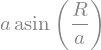

In [177]:
import sympy as sp

# Define symbols
a, rho, R, theta, r = sp.symbols('a rho R \\theta r ', real=True, positive=True)

# Define the integrand
integrand = a / sp.sqrt(a**2 - rho**2)

# Compute the integral
integral_result = sp.integrate(integrand, (rho, 0, R))

# Simplify the result
integral_result_simplified = sp.simplify(integral_result)


integral_result_simplified

In [175]:
Integrand2 = R

# Compute the integral
integral_result2 = integrate(Integrand2, (theta, 0, 2 * sp.pi))

# Simplify the result
integral_result_simplified2 = simplify(integral_result2)

# Display the result
integral_result_simplified2



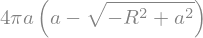

In [179]:


# Inner integral
inner_integral = integrate(a * r / sp.sqrt(a**2 - r**2), (r,0,R))

# Outer integral
A = 2 * integrate(inner_integral, (phi, 0, 2 * sp.pi))

# Simplify the result
A.simplify()

In [180]:


# Inner integral
inner_integral = integrate(a * r / sp.sqrt(a**2 - r**2), (r,0,a))

# Outer integral
A = 2 * integrate(inner_integral, (phi, 0, 2 * sp.pi))

# Simplify the result
A.simplify()

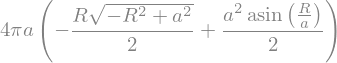

In [188]:
integrate11 = a* r**2 *sin(theta)/sqrt(a**2 - r**2)


A1 = integrate(integrate11, (r, 0, R))

A2 = integrate(A1, (theta, 0, pi))

A3 = integrate(A2, (phi,0, 2 *pi))

A3 



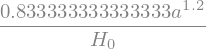

In [211]:

# Define the symbols
x, a, H0, Omega_m0, psi = sp.symbols('x a H0 Omega_m0 \\psi', positive=True)

integrant =(1/H0) * (x / (Omega_m0 + (1-Omega_m0)*x))**0.2

# for the flat universe, we have Omega_m =1, thus 

integrant2 = integrant.subs(Omega_m0,1)

result = integrate(integrant2,(x,0,a))
result 



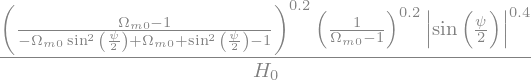

In [ ]:
#for spherical universe, Omega_m0 > 1
# with 
x1 = (Omega_m0 / (Omega_m0 - 1))*sin(psi/2)**2 

integrant3 = factor(integrant.subs(x,x1))

integrant3




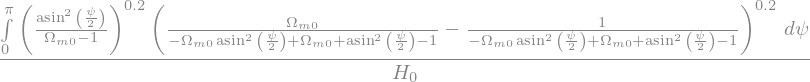

In [221]:
#for spherical universe, Omega_m0 < 1
# with 
x1 = (Omega_m0 / (Omega_m0 - 1))*asin(psi/2)**2 

integrant4 = factor(integrant.subs(x,x1))

integrate(integrant4,(psi,0,pi))

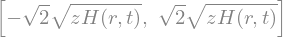

In [239]:
# for Omega_k 0 0
z = Symbol('z')
Omega_k1 = Symbol('\\Omega_{k1}',positive=true)
Omega_r = Symbol('\\Omega_{r}',positive=true)


t_11 = (1/H)*(x / (1+(Omega_k1)*x**2)**0.5) 

result11 = integrate(t_11.subs(Omega_k1,0),(x,0,a))

solve( result11 - z,a)

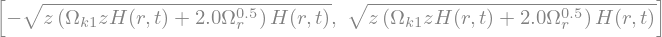

In [237]:
# for Omega_k > 0
z = Symbol('z')
Omega_k1 = Symbol('\\Omega_{k1}',positive=true)
Omega_r = Symbol('\\Omega_{r}',positive=true)

t_11 = (1/H)*(x / (Omega_r+(Omega_k1)*x**2)**0.5) 
result11 = integrate(t_11,(x,0,a))

solve( result11 - z,a)





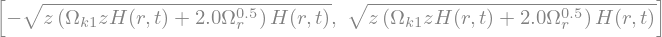

In [ ]:
# for Omega_k < 1


Omega_k1 = Symbol('\Omega_k1',negative=true)

t_22 = (1/H)*(x / (Omega_r+(Omega_k1)*x**2)**0.5) 
result22 = integrate(t_22,(x,0,a))
# here z = t


solve(result22-z,a)


H0 t = 


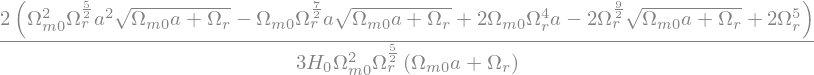

In [245]:
sub = Omega_m0 * x + Omega_r
t = 1/H0 * (x/(sqrt(sub)))
t_1 = simplify(integrate(t,(x,0,a)))
print('H0 t = ')
factor (t_1)

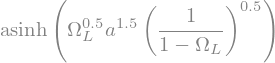

In [ ]:
from sympy import Symbol, integrate, sqrt

# Define the symbols Omega_Lambda > 0 
Omega_L = Symbol('Omega_L', positive=True)
y = Symbol('y')
k = Symbol('k')

# Define the integrand
t_33 = 1 / sqrt(1 + y**2)  # Use sqrt or rational exponent

# Perform the integration
result = integrate(t_33, (y, 0, k))


result.subs(k, ((a**3)*(Omega_L)/(1-Omega_L))**0.5)

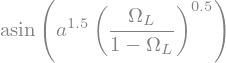

In [254]:
# for Omega_Lambda <  0

# Define the symbols Omega_Lambda > 0 
Omega_L = Symbol('Omega_L', Negative=True)
y = Symbol('y')
k = Symbol('k')

# Define the integrand
t_33 = 1 / sqrt(1 - y**2)  # Use sqrt or rational exponent

# Perform the integration
result = integrate(t_33, (y, 0, k))


result.subs(k, ((a**3)*(Omega_L)/(1-Omega_L))**0.5)